# Sales Pipeline (Funnel) Data

#### Structure of dataset:
- File: "sales-funnel.csv"

In [65]:
import pandas as pd

df = pd.read_csv('sales-funnel.csv')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [66]:
df.columns

Index(['Account', 'Name', 'Rep', 'Manager', 'Product', 'Quantity', 'Price',
       'Status'],
      dtype='object')

In [67]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [68]:
prices = df["Price"]
prices

0      30000
1      10000
2       5000
3      35000
4      65000
5      40000
6      10000
7       5000
8      35000
9      65000
10     30000
11      5000
12     10000
13      7000
14    100000
15     65000
16      5000
Name: Price, dtype: int64

In [69]:
prices.std()

28444.605608714177

In [70]:
df.describe()

,Account,Quantity,Price
count,17.000000,17.000000,17.000000
mean,462254.235294,1.764706,30705.882353
std,259093.442862,1.032558,28444.605609
min,141962.000000,1.000000,5000.000000
25%,218895.000000,1.000000,7000.000000
50%,412290.000000,2.000000,30000.000000
75%,714466.000000,2.000000,40000.000000
max,740150.000000,5.000000,100000.000000


In [71]:
df[["Name", "Rep", "Status"]].head()

,Name,Rep,Status
0,Trantow-Barrows,Craig Booker,presented
1,Trantow-Barrows,Craig Booker,presented
2,Trantow-Barrows,Craig Booker,pending
3,"Fritsch, Russel and Anderson",Craig Booker,declined
4,Kiehn-Spinka,Daniel Hilton,won


In [72]:
#Create a variable that stores the value of the Status series

status = df["Status"]

In [73]:
#Select only the Status, Product and Price columns

df[["Status", "Product", "Price"]]

,Status,Product,Price
0,presented,CPU,30000
1,presented,Software,10000
2,pending,Maintenance,5000
3,declined,CPU,35000
4,won,CPU,65000
5,pending,CPU,40000
6,presented,Software,10000
7,pending,Maintenance,5000
8,declined,CPU,35000
9,won,CPU,65000


In [74]:
#Search for the Pending records

is_pending = df["Status"] == 'pending'
df[is_pending]

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
11,239344,Stokes LLC,Cedric Moss,Fred Anderson,Maintenance,1,5000,pending


In [75]:
#Search for large contracts over $8000

big_contract = df["Price"] > 8000
df[big_contract]

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won
10,163416,Purdy-Kunde,Cedric Moss,Fred Anderson,CPU,1,30000,presented
12,239344,Stokes LLC,Cedric Moss,Fred Anderson,Software,1,10000,presented


In [77]:
#Search for large contracts over $8000 or those that are Pending

df[(big_contract) | (is_pending)]

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [ ]:
"""
Compute the average contract Price for opportunities that are both

- Status is pending, won, or presented (AND)
- Product is either CPU or Maintenance
"""

In [78]:
is_pending = df["Status"] == "pending"
is_presented = df["Status"] == "presented"
is_won = df["Status"] == "won"
products_cpu = df["Product"] == "CPU"
products_maintenance = df["Product"] == "Maintenance"

status_filter = (is_pending | is_presented | is_won)
product_filter = (products_cpu | products_maintenance)
df[status_filter & product_filter]["Price"].mean()

35200.0

In [79]:
#another way to do it!

status_mask = df["Status"].isin(["pending", "presented", "won"])
product_mask = df["Product"].isin(["CPU", "Maintenance"])
df[status_mask & product_mask]["Price"].mean()

35200.0

In [80]:
#Create an Amount column which shows the total amount (Quantity * Price)

df["Amount"] = df["Quantity"] * df["Price"]
df.head(100)

,Account,Name,Rep,Manager,Product,Quantity,Price,Status,Amount
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented,30000
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented,10000
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending,10000
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined,35000
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won,130000
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending,80000
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented,10000
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending,10000
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined,35000
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won,130000


In [81]:
#Calculate the total Amount pending

is_pending = df["Status"] == "pending"
df[is_pending]["Amount"].sum()

105000

In [82]:
#What's the total Amount for Products that were won?

df[df["Status"] == "won"]["Amount"].sum()

781000

In [83]:
#Create a pivot table to show the total Amount by Status

import numpy as np

amount_by_status = pd.pivot_table(
    df,
    index=["Status"],
    values=["Amount"],
    aggfunc=np.sum
)
amount_by_status

,Amount
Status,
declined,200000
pending,105000
presented,100000
won,781000


In [84]:
#Create a pivot table to show the total Amount by Status, segmented by Product

status_product_pivot = pd.pivot_table(
    df,
    index=["Status"],
    values=["Amount"],
    aggfunc=np.sum,
    columns=["Product"]
)
status_product_pivot

Amount                              
Product         CPU Maintenance  Monitor Software
Status                                           
declined   200000.0         NaN      NaN      NaN
pending     80000.0     25000.0      NaN      NaN
presented   60000.0         NaN  10000.0  30000.0
won        760000.0     21000.0      NaN      NaN

In [85]:
#Clean up the missing values (NaN) by replacing them with 0
#Show the total Amount for each Status, across a Product types

status_product_pivot = pd.pivot_table(
    df,
    index=["Status"],
    values=["Amount"],
    aggfunc=np.sum,
    columns=["Product"],
    fill_value=0, #replaces NaN (no sales records) values with 0
    margins=True #adds total of each row in "All" column
)
status_product_pivot

Amount                                         
Product          CPU Maintenance  Monitor Software        All
Status                                                       
declined    200000.0         0.0      0.0      0.0   200000.0
pending      80000.0     25000.0      0.0      0.0   105000.0
presented    60000.0         0.0  10000.0  30000.0   100000.0
won         760000.0     21000.0      0.0      0.0   781000.0
All        1100000.0     46000.0  10000.0  30000.0  1186000.0

In [86]:
#This explicitly shows the Amount columns

status_product_pivot['Amount']

Product,CPU,Maintenance,Monitor,Software,All
Status,,,,,
declined,200000.0,0.0,0.0,0.0,200000.0
pending,80000.0,25000.0,0.0,0.0,105000.0
presented,60000.0,0.0,10000.0,30000.0,100000.0
won,760000.0,21000.0,0.0,0.0,781000.0
All,1100000.0,46000.0,10000.0,30000.0,1186000.0


In [87]:
#Show the total Amount by Status for CPU

status_product_pivot['Amount']['CPU']

Status
declined      200000.0
pending        80000.0
presented      60000.0
won           760000.0
All          1100000.0
Name: CPU, dtype: float64

In [88]:
#Create a pivot table to show the average Price by Manager and Rep

pd.pivot_table(
    df,
    index=["Manager", "Rep"],
    values=["Price"],
)

Price
Manager       Rep                 
Debra Henley  Craig Booker   20000
              Daniel Hilton  38333
              John Smith     20000
Fred Anderson Cedric Moss    27500
              Wendy Yule     44250

In [96]:
#Show the total Amount by Manager and Rep

pd.pivot_table(
    df,
    index=["Manager", "Rep"],
    values=["Amount"],
    aggfunc=np.sum
)

Amount
Manager       Rep                  
Debra Henley  Craig Booker    85000
              Daniel Hilton  220000
              John Smith      45000
Fred Anderson Cedric Moss    175000
              Wendy Yule     661000

In [97]:
#Show the total Amount and number of sales records by Manager and Rep

pd.pivot_table(
    df,
    index=["Manager", "Rep"],
    values=["Amount"],
    aggfunc=[np.sum,len]
)

sum    len
                             Amount Amount
Manager       Rep                         
Debra Henley  Craig Booker    85000      4
              Daniel Hilton  220000      3
              John Smith      45000      2
Fred Anderson Cedric Moss    175000      4
              Wendy Yule     661000      4

In [99]:
#Show the total Amount, average Price, and number of sales records by Manager and Rep

pd.pivot_table(
    df,
    index=["Manager", "Rep"],
    values=["Amount", "Price"],
    aggfunc={"Amount":[np.sum],"Price":[np.mean,len]}, 
)

Amount Price       
                                sum   len   mean
Manager       Rep                               
Debra Henley  Craig Booker    85000     4  20000
              Daniel Hilton  220000     3  38333
              John Smith      45000     2  20000
Fred Anderson Cedric Moss    175000     4  27500
              Wendy Yule     661000     4  44250

Populating the interactive namespace from numpy and matplotlib


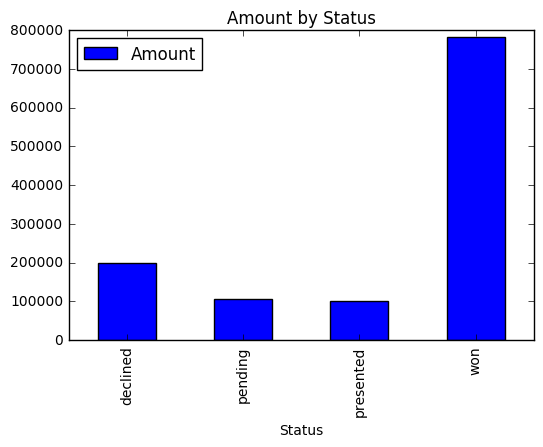

In [100]:
#First, reset the indexes for the amount_by_status pivot table
#Use the plot method to visualize total Amount by Status

%pylab inline

#reset and clear indexes
abs_table = amount_by_status.reset_index()

#shows total Amount by Status
abs_table.plot(
    kind='bar',
    title='Amount by Status',
    x='Status',
    y='Amount'
)